In [1]:
# Import and install dependencies

import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [2]:
# Import MediaPipe's holistic model and drawing utilities
mp_holistic = mp.solutions.holistic 
mp_drawing = mp.solutions.drawing_utils 

def mediapipe_detection(image, model):    
    # Convert the image from BGR to RGB color space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Set the writeable flag of the image to False to prevent modification
    image.flags.writeable = False                       
    
    # Process the image using the provided model (presumably the holistic model)
    results = model.process(image)
    
    # Set the writeable flag of the image back to True for further processing
    image.flags.writeable = True
    
    # Convert the image back from RGB to BGR color space
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)      
    
    # Return the processed image and the results from the model
    return image, results

def draw_styled_landmarks(image, results):
    # Draw left hand landmarks with specific styles if available
    mp_drawing.draw_landmarks(
        image, 
        results.left_hand_landmarks, 
        mp_holistic.HAND_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
        mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
    )
    
    # Draw right hand landmarks with specific styles if available
    mp_drawing.draw_landmarks(
        image, 
        results.right_hand_landmarks, 
        mp_holistic.HAND_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=1, circle_radius=4),
        mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=1, circle_radius=2)
    )

def extract_keypoints(results):
    # Extract left hand keypoints if available, otherwise return a zero array
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    
    # Extract right hand keypoints if available, otherwise return a zero array
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    
    # Concatenate and return the keypoints from both hands
    return np.concatenate([lh, rh])


In [5]:
# open camera using CV2
cap = cv2.VideoCapture(0)

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [6]:
draw_styled_landmarks(frame, results)

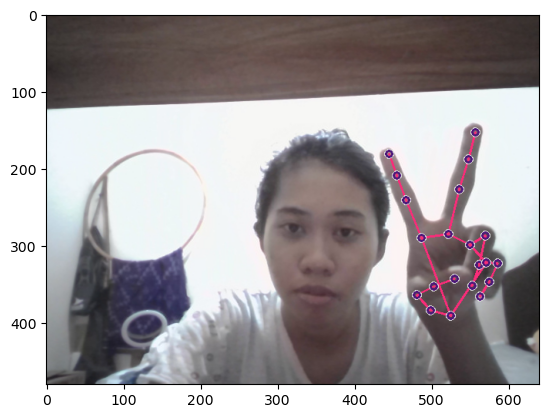

In [7]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [8]:
# Open webcam using CV2 with landmark detection

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [12]:
# Creating datasets folder (from 0- end)

DATA_PATH = 'dataset/dta-25'          # Path for exported data, numpy arrays (where you want to store the data from action that you define)
IMAGE_DATA_PATH = 'dataset/dti-25'    # Path for exported images

actions = np.array(['A', 'B', 'C', 'D', 'E', 'F', 
                    'G', 'H', 'I', 'J', 'K', 'L', 
                    'M', 'N', 'O', 'P', 'Q', 'R', 
                    'S', 'T', 'U', 'V', 'W', 'X', 
                    'Y', 'Z', 'Halo', 'Perkenalkan', 'Nama',
                    'Saya', 'Senang', 'Bertemu', 'Kamu'])       # Actions that we try to detect (Class that we want to create)

In [13]:
no_sequences    = 25               # how many video that we want to create
sequence_length = 30                # Videos are going to be 30 frames in length

In [57]:
# run this code if you want to manage start and end folders

start_folder    = 6 # Define the range for sequence numbering
end_folder      = 24

In [14]:
# create folder for each action
for action in actions:
    # Paths for keypoints data and images
    action_data_path = os.path.join(DATA_PATH, action)
    action_image_path = os.path.join(IMAGE_DATA_PATH, action)

    # Ensure directories exist for both keypoints and images
    os.makedirs(action_data_path, exist_ok=True)
    os.makedirs(action_image_path, exist_ok=True)

    # Instead of checking existing directories, we reset sequence numbering for each action
    for sequence in range(no_sequences):  # change to : "start_folder, end_folder" if you run the start_folder and end_folder. no_sequences
        new_data_dir = os.path.join(action_data_path, str(sequence))
        new_image_dir = os.path.join(action_image_path, str(sequence))
        
        os.makedirs(new_data_dir, exist_ok=True)
        os.makedirs(new_image_dir, exist_ok=True)

In [18]:
# Start create dataset for A


actions = ['A']
no_sequences    = 25      # Number of sequences per action
sequence_length = 30      # Number of frames per sequence
start_sequence  = 0         # Starting sequence number

In [16]:
# setup camera + trying

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [19]:
# Start collecting Dataset

cap = cv2.VideoCapture(0)

mp_holistic = mp.solutions.holistic
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        for i in range(3, 0, -1):
            ret, frame = cap.read()
            cv2.putText(frame, f'Starting in {i}', (200, 200),
                        cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 4, cv2.LINE_AA)
            cv2.imshow('OpenCV Feed', frame)
            cv2.waitKey(1000) 
        for action in actions:
            for sequence in range(start_sequence, start_sequence + no_sequences):
                for frame_num in range(sequence_length):
                    ret, frame = cap.read()
                    image, results = mediapipe_detection(frame, holistic)
                    draw_styled_landmarks(image, results)
                    if frame_num == 0:
                        cv2.putText(image, 'STARTING_COLLECTION', (120, 200),
                                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence),
                                    (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
                        cv2.imshow('OpenCV Feed', image)
                        cv2.waitKey(3000) 
                    else:
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence),
                                    (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        cv2.imshow('OpenCV Feed', image)
                    keypoints = extract_keypoints(results)
                    npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                    np.save(npy_path, keypoints)
                    img_path = os.path.join(IMAGE_DATA_PATH, action, str(sequence), f"{frame_num}.jpg")
                    cv2.imwrite(img_path, image)
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break
                if sequence < start_sequence + no_sequences - 1:
                    cv2.putText(image, 'WAITING 3 SECONDS', (120, 200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 4, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(3000) 
        cap.release()
        cv2.destroyAllWindows()